<a href="https://colab.research.google.com/github/abhaymamadapur/CE888/blob/main/lab2/bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [1]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [51]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
data

array([ 2.,  8., 20., 13.,  5.,  9., 10.,  8., 22., 10.,  2.,  4.,  7.,
        9.])

In [3]:
# Bootstrap withput meaning
def bootstrap_mean(x, sample_size, n_bootstraps):
  mean_arr=[]
  for i in range(n_bootstraps):
    mean_arr.append(np.mean(np.random.choice(x,sample_size,replace=True)))
    
  data_mean = np.mean(mean_arr)
  lower = np.percentile(mean_arr,2.5)
  upper = np.percentile(mean_arr,97.5)
  return data_mean, lower, upper

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

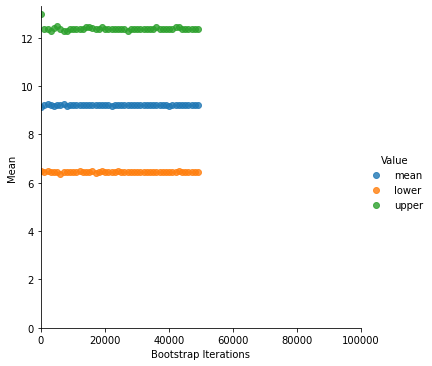

In [65]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)




```
# This is formatted as code
```


Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [4]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
  mean_arr=[]
  for i in range(n_bootstraps):
    mean_arr.append(np.mean(np.random.choice(sample,sample_size,replace=True)))
    
  data_mean = np.mean(mean_arr)
  percentile = 100-ci
  lower = np.percentile(mean_arr,round(percentile/2,1))
  upper = np.percentile(mean_arr,ci+round(percentile/2,1))
  return data_mean, lower, upper

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

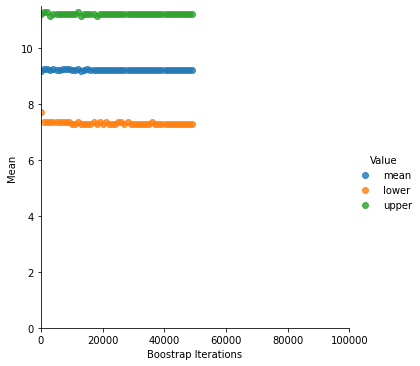

In [66]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


In [54]:
vehicleDataSet = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv")
currentFleetData = vehicleDataSet["Current fleet"].dropna()
newFleetData= vehicleDataSet["New Fleet"].dropna()



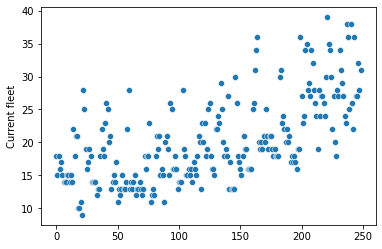

In [67]:
sns.scatterplot(x=currentFleetData.index.values,y=currentFleetData)

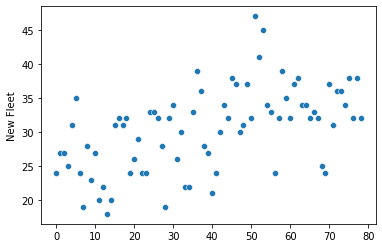

In [68]:
sns.scatterplot(x=newFleetData.index.values,y=newFleetData)

## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [6]:
# Answer 1
currentFleetMean = currentFleetData.mean()
print("Current Fleet Data mean ,",currentFleetMean)
newFleetMean = newFleetData.mean()
print("New Fleet Data mean ,",newFleetMean)

Current Fleet Data mean , 20.14457831325301
New Fleet Data mean , 30.481012658227847


In [11]:
# Answer 2.1
bootstrap_mean_ci(currentFleetData,len(currentFleetData),20000,95)

(20.14300903614458, 19.357329317269077, 20.93574297188755)

In [13]:
# Answer 2.2
bootstrap_mean_ci(newFleetData,len(newFleetData),20000,95)

(30.482337974683546, 29.151898734177216, 31.82278481012658)

In [40]:
# To calculate the P- value

def permut_test(sample1, sample2, n_permutations):
  concatenatedData = np.concatenate((sample1,sample2))
  count=0
  # Calculating mean of current fleet.
  currentFleetMean =np.mean(sample1)
  print("Mean of currentFleetMean",currentFleetMean)
  # Calculating mean of new fleet.
  newFleetMean = np.mean(sample2)
  print("Mean of newFleetMean",newFleetMean)
  t_obs  = newFleetMean - currentFleetMean
  print("T-Observe mean", t_obs)

  for i in range(n_permutations):
    perm_arr = np.random.permutation(concatenatedData)
    newSample1 = perm_arr[:len(sample1)]
    newSample2 = perm_arr[len(sample1):]
    t_perm = newSample2.mean()-newSample1.mean()
    if(t_perm>t_obs):
      count = count+1

  pvalue = count/n_permutations
  return pvalue


In [43]:
# Answer 2.3
permut_test(currentFleetData,newFleetData,30000)

Mean of currentFleetMean 20.14457831325301
Mean of newFleetMean 30.481012658227847
T-Observe mean 10.336434344974837


0.0

In [20]:
def bootstrap_std_ci(sample, sample_size, n_bootstraps, ci):
  std_arr=[]
  for i in range(n_bootstraps):
    std_arr.append(np.std(np.random.choice(sample,sample_size,replace=True)))
    
  data_std = np.std(std_arr)
  percentile = 100-ci
  lower = np.percentile(std_arr,round(percentile/2,1))
  upper = np.percentile(std_arr,ci+round(percentile/2,1))
  return data_std, lower, upper



In [ ]:
# Customer Data   bootstrap. - BOOTSTRAP MEAN CI
bootstrap_mean_ci(data,len(data),10000,95)

In [53]:
# Customer Data   bootstrap. - BOOTSTRAP STD CI
bootstrap_std_ci(data,len(data),10000,90)

(1.1994089916178219, 3.040416476715709, 7.128557114214086)

In [50]:
# Vehicle currentData bootstrap -  BOOTSTRAP MEAN CI
bootstrap_mean_ci(currentFleetData,len(currentFleetData),10000,92)

(20.143025702811244, 19.449799196787147, 20.8714859437751)

In [ ]:
# Vehicle newData bootstrap -  BOOTSTRAP MEAN CI
bootstrap_mean_ci(newFleetData,len(newFleetData),10000,80)

(30.47065569620253, 29.582278481012658, 31.341772151898734)

In [ ]:
# Vehicle currentData bootstrap - BOOTSTRAP STD CI
bootstrap_std_ci(currentFleetData,len(currentFleetData),10000,73)

(0.29101095170849506, 6.066376394996033, 6.715564864419552)

In [ ]:
# Vehicle newData bootstrap - BOOTSTRAP STD CI
bootstrap_std_ci(newFleetData,len(newFleetData),10000,95)

(0.4454237392630314, 5.162438284998818, 6.906134110313684)

In [55]:
#Vehicle p-value
permut_test(currentFleetData,newFleetData,30000)

Mean of currentFleetMean 20.14457831325301
Mean of newFleetMean 30.481012658227847
T-Observe mean 10.336434344974837


0.0

In [56]:
# Voting Data ---
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]

In [ ]:
len(dem_share_PA)

67

In [ ]:
len(dem_share_OH)

88

In [58]:
# Voting Data PA ---BOOTSTRAP MEAN CI
bootstrap_mean_ci(dem_share_PA,len(dem_share_PA),20000,95)

(45.48329044029851, 43.227376865671644, 47.86359701492537)

In [59]:
# Voting Data OH ---BOOTSTRAP MEAN CI
bootstrap_mean_ci(dem_share_OH,len(dem_share_OH),20000,95)

(44.32539798863636, 42.27760227272727, 46.36921875)

In [64]:
#Voting Data OH - Permutation
permut_test(dem_share_OH,dem_share_PA,10000)

Mean of currentFleetMean 44.31818181818182
Mean of newFleetMean 45.476417910447765
T-Observe mean 1.1582360922659447


0.2407